In [35]:
import os
import csv
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from umap import UMAP

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [36]:
filenames = os.listdir('/ssd_scratch/users/mounika.k/chess_audio')
filenames = [f.replace('.mp3', '') for f in filenames] 

In [37]:
filenames.sort()

In [38]:
filenames

['-0cvmd4UoYY',
 '-0gRIj0vkIU',
 '-18a84JHLdo',
 '-1EV8tt20hg',
 '-1mropfKtEw',
 '-2-lW9rYmh4',
 '-2Q2OHFZXWg',
 '-3otg-asbvc',
 '-4zG5MwvJXU',
 '-52He4PF-NA',
 '-5D2tjLVp48',
 '-5IoH91GAzA',
 '-5u5uuMdAJc',
 '-6QX53BmDbg',
 '-6hO5K0m16Y',
 '-6kZWBE2jdw',
 '-6vZkBxckU0',
 '-7PI9Q9uoSE',
 '-7VLF0XQghw',
 '-81MwXjQhZA',
 '-8Un1-oS4_A',
 '-8hZeVtAGhc',
 '-9NIze9FCIA',
 '-9PMGdZYZFA',
 '-9cCbATiUTQ',
 '-AaAqhgqZbs',
 '-BkW9a150wk',
 '-BwjT9Cvp18',
 '-BzocnDPuIs',
 '-CDQH2XHzJM',
 '-CoYV4tVouk',
 '-CyvFxV_ONE',
 '-D0gznjeySE',
 '-DFX-x_Q_LQ',
 '-EDzMUhSBXw',
 '-Eco8zfPvhI',
 '-En_grRzx3g',
 '-GEsoR1Owoc',
 '-GYrlMBb2hs',
 '-GpYhKU1iGs',
 '-Hwx8QQQyQ8',
 '-HyL_zMmaGI',
 '-JQQt8XG0iA',
 '-JfkU8dnjHI',
 '-JfqhOaXjVg',
 '-NozSoqprUM',
 '-O4L1Jn5vT8',
 '-OOwx7Q4q0U',
 '-O_9OMk2Qz8',
 '-Q48ab6q1Qs',
 '-Qi_f_tOmS4',
 '-QxhynY7Cyg',
 '-UNGDPtsEeg',
 '-UdpVy1aft0',
 '-W1cNB7LO0E',
 '-WXEeY-VO8U',
 '-WuYsCApZXo',
 '-YA5YsW_-kI',
 '-ZNS8LP_0Mg',
 '-ZSHtlS3ABY',
 '-ZWGaSGPRH8',
 '-ZxQABkfSU0',
 '-_W8jb

In [39]:
df_files = pd.DataFrame(filenames, columns=['filenames'])
df_files

,filenames
0,-0cvmd4UoYY
1,-0gRIj0vkIU
2,-18a84JHLdo
3,-1EV8tt20hg
4,-1mropfKtEw
...,...
6012,zvbHHu1hezc
6013,zwwd3YLT7DE
6014,zxzNReZDB84
6015,zygRli1vLuk


In [40]:
data = pd.read_csv('chess/cleaned_chess_dataset.csv')
data

,videoid,videoTitle,videoPublishedDate,videoDescription,videoLikeCount,videoDislikeCount,videoViewCount,videoCommentCount,channelID,channelTitle,channelPublishedAt,channelDescription,channelRegionCode,videoCount,channelViewCount,subscriberCount,channelLiveBroadcastContent,videoPublishedYear,commentsToViewsRatio
0,pinaucMst7I,Fischer Random Streamer Battle! | Arena Kings,2021-02-05,"With new year, Chess.com is bringing back an e...",266,8,14126,9,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.020034
1,flS8iUrCW6A,Charlie Finds Out The 'Engine' Was Hikaru,2021-02-05,@penguinz0 thought he was playing against some...,2222,29,40817,66,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.056766
2,6vDFPFsMTpw,Greg Shahade vs Kostya Kavutskiy | I'm Not a G...,2021-02-04,IM Not A GM is back with the quarterfinals!. T...,784,21,55569,20,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.014846
3,SbYyRFCXWZQ,Janowski Hangs His Queen On Purpose...And Wins,2021-02-04,Join WFM Alessia Santeramo as she breaks down ...,273,16,6982,33,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.046119
4,gpllAezf53E,Roberto Molina vs Lawrence Trent | I'm Not a G...,2021-02-03,IM Not A GM is back with the quarterfinals!. T...,1009,17,63439,33,UC5kS0l76kC0xOzMPtOmSFGw,Chess.com,2007-07-14T22:42:26Z,Chess.com is the #1 chess site in the world! V...,IN,2945,121653031,569000,upcoming,2021,0.016693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,JwoYK1bQRRE,Brilliancy by Greco,2011-04-01,World's Best Chess Miniatures\nOwen Defence\nG...,489,4,15421,17,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.033072
8158,ZDAsxnee_9U,Amazing chess game known as: The skewer lure,2011-04-01,World's Best Chess Miniatures\nAndrews vs Jass...,4205,33,209833,281,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.021536
8159,__lxgA7xvJI,Naval intelligence,2011-04-01,World's Best Chess Miniatures\nCaptain William...,1766,19,89509,51,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.020512
8160,IzSeJ5Vi-o8,Crashing attack by Bill Wall,2011-04-01,World's Best Chess Miniatures\nBird Opening: F...,833,14,47326,32,UCMxK1FKAbmj2N-faTWLwNig,Chess School,2011-02-03T03:17:20Z,Thank you for visiting Chess School channel. H...,IN,3168,89781697,147000,none,2011,0.018573


In [41]:
df_final = pd.merge(df_files, data, left_on='filenames', right_on='videoid')

In [42]:
df_final['cid'] = pd.factorize(df_final.channelTitle)[0]
#0 - chess.com, 1-agad, 2 - chess school

In [43]:
df_final.channelTitle

0                       Chess.com
1       agadmator's Chess Channel
2       agadmator's Chess Channel
3                       Chess.com
4                       Chess.com
                  ...            
6012                 Chess School
6013                    Chess.com
6014                    Chess.com
6015    agadmator's Chess Channel
6016                    Chess.com
Name: channelTitle, Length: 6017, dtype: object

In [44]:
embeddings = np.loadtxt("/ssd_scratch/users/mounika.k/chess_audio_embeddings.tsv")

embeddings.shape

(6017, 2048)

In [45]:
def reduce_dim(weights, components = 3, method = 'tsne'):
    #Reduce dimensions of embeddings
    if method == 'tsne':
        return TSNE(components, metric = 'cosine').fit_transform(weights)
    elif method == 'umap': 
        return UMAP(n_components = components, metric = 'cosine',
                   init = 'random', n_neighbors = 5).fit_transform(weights)

In [46]:
reduced_vecs = reduce_dim(embeddings, components = 2, method = 'tsne')

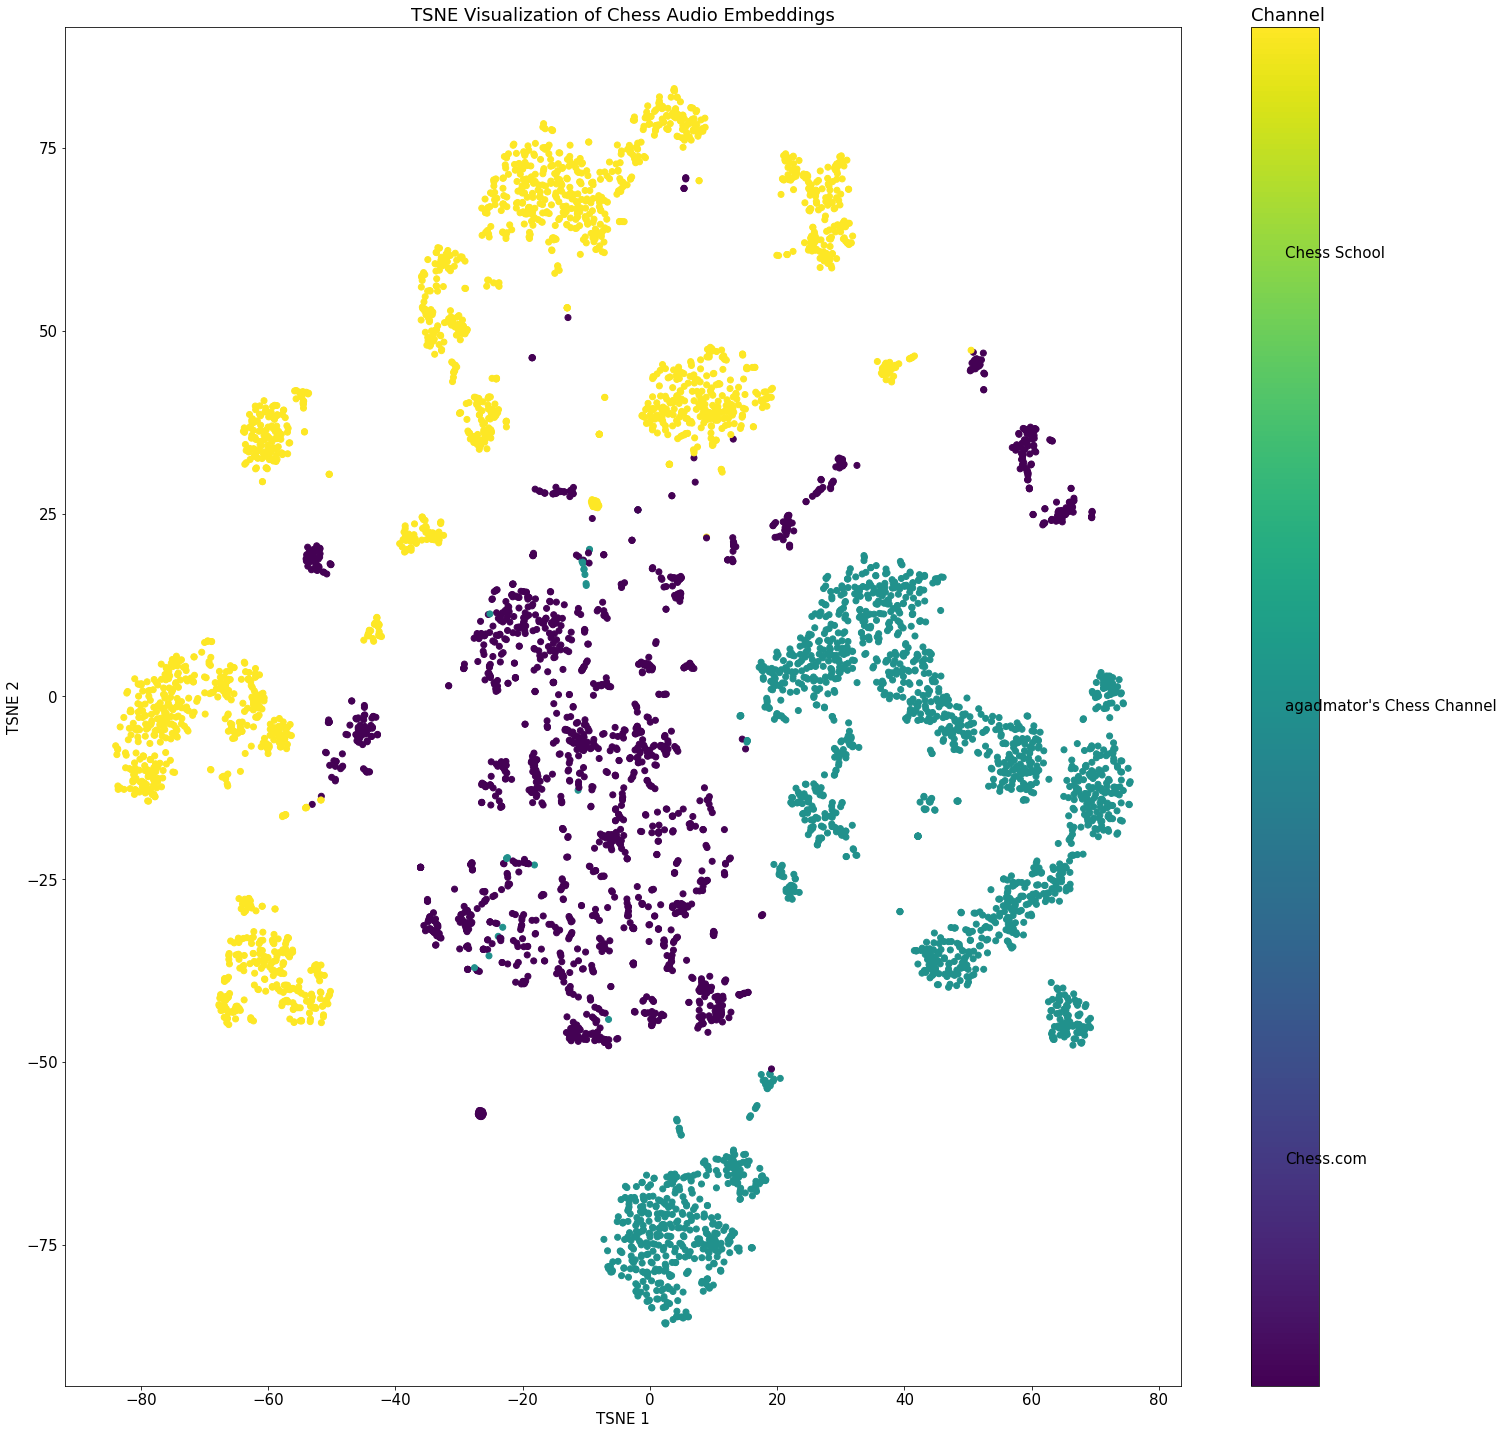

In [55]:
gen = ["Chess.com", "agadmator's Chess Channel", "Chess School"]

InteractiveShell.ast_node_interactivity = 'last'

x = list(reduced_vecs[ : , 0])
y = list(reduced_vecs[ : , 1])
n = list(range(0, 6017))

plt.figure(figsize = (25, 25))
plt.rcParams.update({'font.size': 15})
# cm = plt.cm.get_cmap('RdYlBu')
# Plot embedding
plt.scatter(reduced_vecs[ : , 0], reduced_vecs[ : , 1], c = df_final.cid)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])

for j, lab in enumerate(gen):
    cbar.ax.text(1, (2 * j + 1) / ((3)), lab, ha='left', va='center')
cbar.ax.set_title('Channel', loc = 'left')

# for i, txt in enumerate(n):
#     plt.annotate(txt, (x[i], y[i]))

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE Visualization of Chess Audio Embeddings')
# plt.savefig('chess_audio_embeddings_tsne.png')



In [56]:
reduced_vecs_umap = reduce_dim(embeddings, components = 2, method = 'umap')

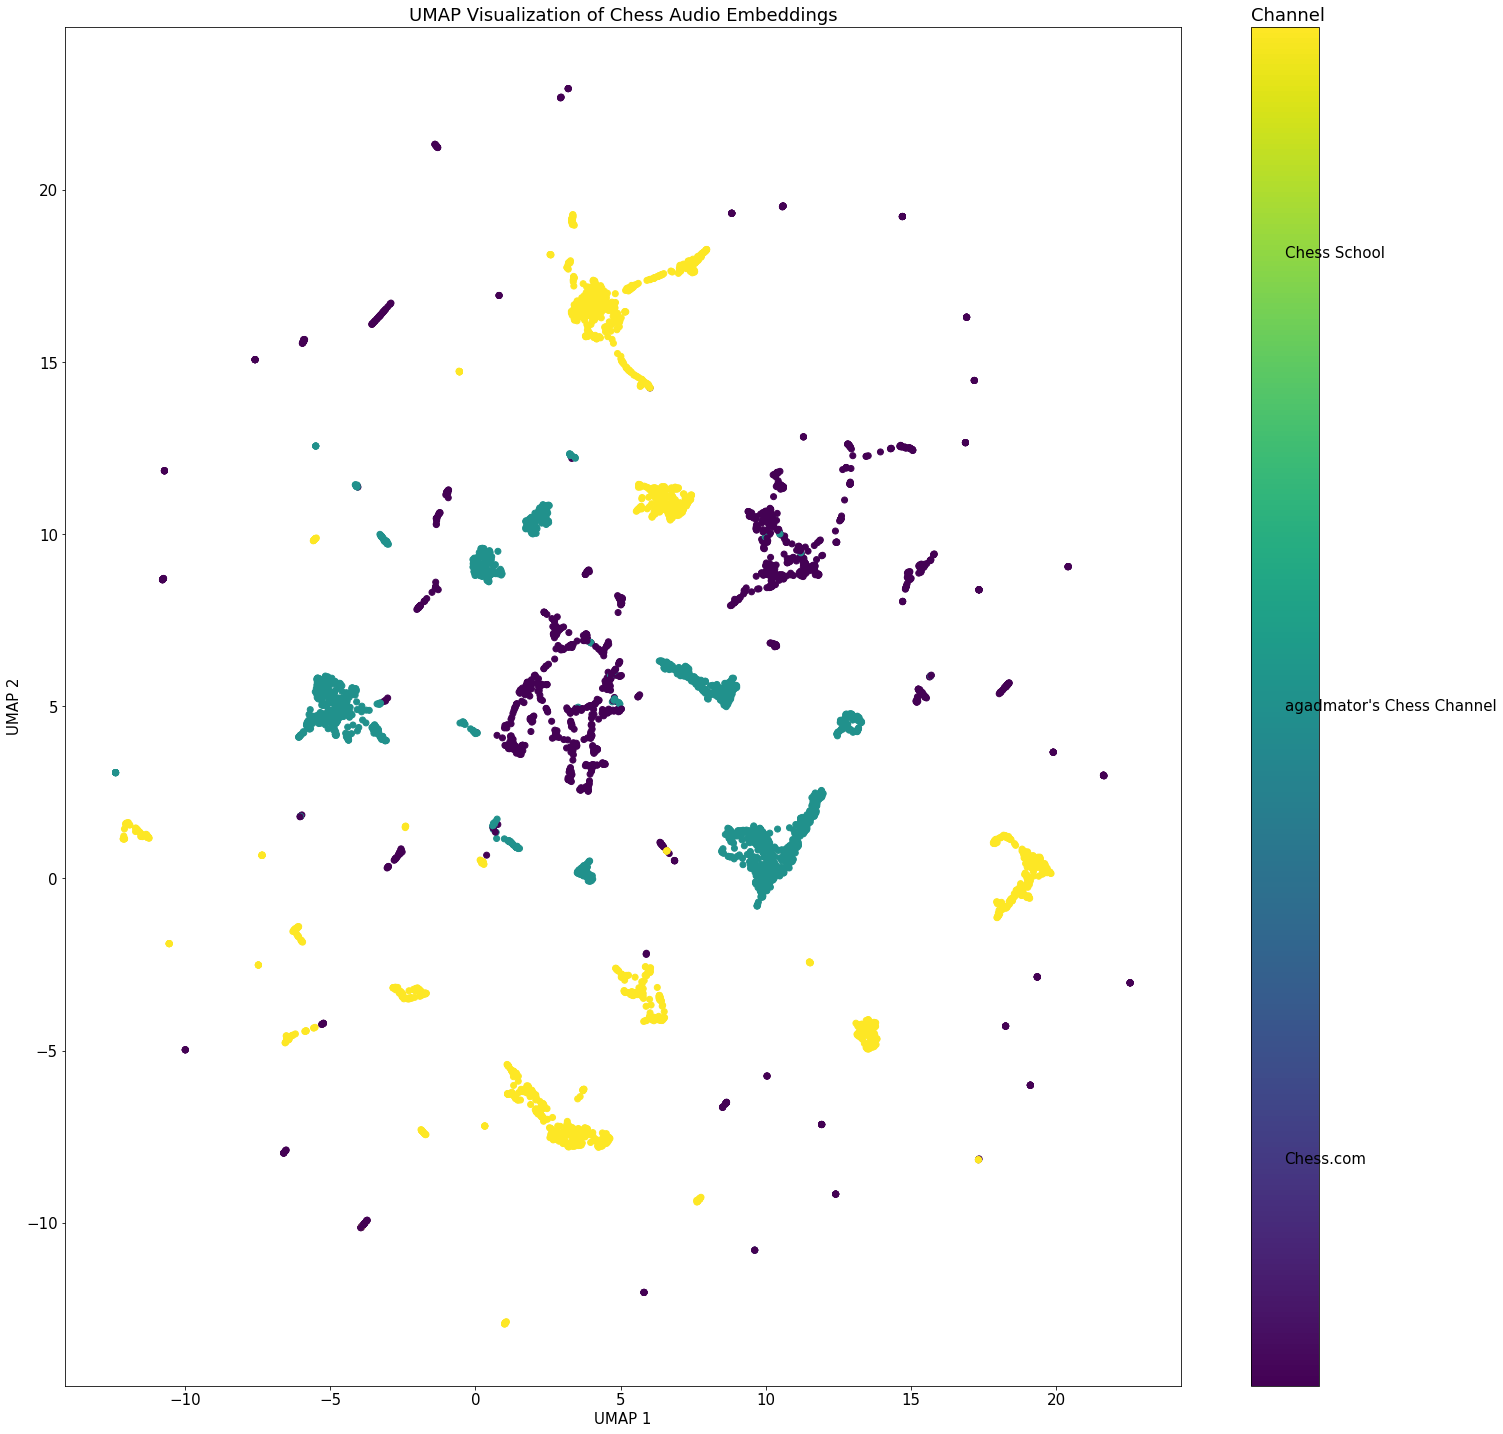

In [57]:
gen = ["Chess.com", "agadmator's Chess Channel", "Chess School"]

InteractiveShell.ast_node_interactivity = 'last'

x = list(reduced_vecs_umap[ : , 0])
y = list(reduced_vecs_umap[ : , 1])
n = list(range(0, 6017))

plt.figure(figsize = (25, 25))
plt.rcParams.update({'font.size': 15})
# cm = plt.cm.get_cmap('RdYlBu')
# Plot embedding
plt.scatter(reduced_vecs_umap[ : , 0], reduced_vecs_umap[ : , 1], c=df_final.cid)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])

for j, lab in enumerate(gen):
    cbar.ax.text(1, (2 * j + 1) / ((3)), lab, ha='left', va='center')
cbar.ax.set_title('Channel', loc = 'left')

# for i, txt in enumerate(n):
#     plt.annotate(txt, (x[i], y[i]))

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Visualization of Chess Audio Embeddings')
# plt.savefig('chess_audio_embeddings_umap.png')


